In [76]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    s=1/(1+(np.exp(-z)))
    return s

In [5]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Backward propagation</font>

In [6]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        
        part_2 = np.tanh(part_1 + w[6])
        
        temp = np.sin(x[2]*w[2])
        temp1 = (w[3]*x[3] + w[4]*x[4])
        part_3 = sigmoid((temp * temp1) + w[7])
        
        y_= (w[8] * part_3) + part_2
        
        L=np.power((y_ - y),2)
        
        dl=2*(y_ - y)
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = L
        forward_dict['dy_pred'] = dl
        
        return forward_dict

In [7]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    print(dl,data['dy_pred'])
    loss=(data['loss']==0.9298048963072919)
    print(loss)
    part1=(data['exp']==1.1272967040973583)
    print(part1)
    part2=(data['tanh']==0.8417934192562146)
    print(part2)
    part3=(data['sigmoid']==0.5279179387419721)
    print(part3)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True -1.9285278284819143
True
True
True
True


True

# <font color='red'>Task 1.2 </font>

 ## <font color='blue'>Gradient clipping</font>

In [8]:
def backward_propagation(x,y,w,forward_dict):
    d=forward_dict
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    dw1 = d['dy_pred']*(1-np.power(d['tanh'],2))*d['exp'] * 2*((x[1]*w[1])+(x[0]*w[0]))*x[0]     # in dw1 compute derivative of L w.r.to w1
    dw2 = d['dy_pred']*(1-np.power(d['tanh'],2))*d['exp'] * 2*((x[1]*w[1])+(x[0]*w[0]))*x[1]     # in dw2 compute derivative of L w.r.to w2
    dw3 = d['dy_pred']*d['sigmoid']*(1-d['sigmoid'])*w[8] * (w[4]*x[4]+w[3]*x[3])*np.cos(x[2]*w[2])*x[2]      # in dw3 compute derivative of L w.r.to w3
    dw4 = d['dy_pred']*d['sigmoid']*(1-d['sigmoid'])*w[8] * (np.sin(w[2]*x[2])*x[3])  # in dw4 compute derivative of L w.r.to w4
    dw5 = d['dy_pred']*d['sigmoid']*(1-d['sigmoid'])*w[8] * (np.sin(w[2]*x[2])*x[4])  # in dw5 compute derivative of L w.r.to w5
    dw6 = d['dy_pred']*(1-np.power(d['tanh'],2))*d['exp']                             # in dw6 compute derivative of L w.r.to w6
    dw7 = d['dy_pred']*(1-np.power(d['tanh'],2))                                      # in dw7 compute derivative of L w.r.to w7
    dw8 = d['dy_pred']*d['sigmoid']*(1-d['sigmoid'])*w[8]                             # in dw8 compute derivative of L w.r.to w8
    dw9 = d['dy_pred']*d['sigmoid']                                                   # in dw9 compute derivative of L w.r.to w9
    
    
    backward_dict={}
    backward_dict['dw1']=dw1
    backward_dict['dw2']=dw2
    backward_dict['dw3']=dw3
    backward_dict['dw4']=dw4
    backward_dict['dw5']=dw5
    backward_dict['dw6']=dw6
    backward_dict['dw7']=dw7
    backward_dict['dw8']=dw8
    backward_dict['dw9']=dw9
    
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    
    
    return backward_dict

In [9]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    print(dw1,data['dw1'])
    dw2=(np.round(data['dw2'],6)==-0.021408)
    print(dw2,data['dw2'])
    dw3=(np.round(data['dw3'],6)==-0.005625)
    print(dw3,data['dw3'])
    dw4=(np.round(data['dw4'],6)==-0.004658)
    print(dw4,data['dw4'])
    dw5=(np.round(data['dw5'],6)==-0.001008)
    print(dw5,data['dw5'])
    dw6=(np.round(data['dw6'],6)==-0.633475)
    print(dw6,data['dw6'])
    dw7=(np.round(data['dw7'],6)==-0.561942)
    print(dw7,data['dw7'])
    dw8=(np.round(data['dw8'],6)==-0.048063)
    print(dw8,data['dw8'])
    dw9=(np.round(data['dw9'],6)==-1.018104)
    print(dw9,data['dw9'])
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
#print(w,X[0],y[0])
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True -0.22973323498702
True -0.02140761471775293
True -0.00562540558026632
True -0.004657941222712424
True -0.0010077228498574248
True -0.6334751873437471
True -0.561941842854033
True -0.04806288407316517
True -1.0181044360187037


True

# <font color='red'>Task 1.3 </font>

## <font color='red'> Implementing Gradient checking </font> <br>

In [16]:
w=np.ones(9)*0.1

In [18]:
def gradient_checking(x,y,w,eps):
    w1=w.copy()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    true_grad_list=list(backward_dict.values())
    
    approx_gradients=[]
    gradient_check_value=[]
    for i in range(len(w)):
        w[i]=w1[i]+eps
        L=forward_propagation(x,y,w)
        loss1=L['loss']
        
        w[i]=w1[i]-eps
        L=forward_propagation(x,y,w)
        loss2=L['loss']
        
        temp=(loss1-loss2)/(2*eps)
        #print(temp)
        #print(np.linalg.norm(temp-true_grad_list[i]))
        #print(np.linalg.norm(temp+true_grad_list[i]))
        #print(true_grad_list[i])
 
        temp_1=np.linalg.norm(true_grad_list[i]-temp)
        temp_2=np.linalg.norm(true_grad_list[i])+np.linalg.norm(temp)
        diff=temp_1/temp_2
        
        gradient_check_value.append(float(diff))
  

    return np.array(gradient_check_value)
    
    
gradient_checking(X[0],y[0],w,1e-7)

array([5.80331065e-10, 4.44245958e-07, 5.84661166e-08, 4.41923914e-07,
       7.55104149e-07, 2.44617120e-08, 1.55706680e-07, 4.91602262e-08,
       1.13187430e-08])

In [19]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= (10**-3)))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[1.73921918e-08 1.28741906e-05 2.55164399e-04 1.05871856e-05
 1.95446016e-04 1.16536595e-10 9.63625495e-08 1.06774471e-07
 1.43339489e-08]


True

# <font color='red'> Task 2 : Optimizers </font>

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [57]:
epoch=100
rate=.001
mu, sigma = 0, 0.01 
w = np.random.normal(mu, sigma, 9) 

In [60]:
loss=[]
for i in tqdm(range(epoch)):
    y_=[]
    for j in range(len(X)):
        d1=forward_propagation(X[j],y[j],w)
        d2=backward_propagation(X[j],y[j],w,d1)
        y_.append(d1['dy_pred'])
        
        for k in range(len(w)):
            w[k]=w[k]-rate*d2["dw"+str(k+1)]
        
        
    temp=mean_squared_error(y,y_)
        
    loss.append(temp)
        

print("loss in each epoch")        
print(loss)
x1=loss            

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.01it/s]

loss in each epoch
[11.913097160676717, 8.668846763910661, 6.822014217081387, 5.6051733655386915, 4.806760421784106, 4.294798677843243, 3.972374749335032, 3.7715198497709674, 3.647144324443328, 3.570369814210726, 3.523052810140151, 3.4939084733777444, 3.475954873961866, 3.464884428743048, 3.4580435176349447, 3.4537986470631195, 3.4511445279785136, 3.4494623486728178, 3.4483708953524665, 3.4476349299290705, 3.4471088269043983, 3.446701904121958, 3.44635709366979, 3.446037812685753, 3.445719872641714, 3.4453864832671046, 3.4450251561134664, 3.444625773205779, 3.4441793693256377, 3.443677350561668, 3.4431109788763257, 3.4424710184260467, 3.4417474801342753, 3.4409294263378905, 3.440004813232719, 3.438960359047683, 3.4377814326761515, 3.4364519623048704, 3.434954367282667, 3.433269519594828, 3.4313767441601235, 3.429253869890757, 3.4268773460631583, 3.4242224409288937, 3.42126354140998, 3.417974573788768, 3.4143295649847603, 3.410303361624135, 3.405872518849428, 3.4010163618438254, 3.39571

graph of epoch vs loss of vanilla update


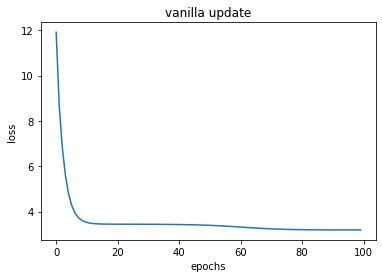

In [83]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = np.arange(100)
# corresponding y axis values
y = x1
  
plt.xlabel('epochs')
plt.ylabel('loss')
# plotting the points 
plt.plot(x, y)
plt.title('vanilla update')
plt.show()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

In [71]:
epoch=100
rate=.001
m=np.zeros(9)
b=.9
mu, sigma = 0, 0.01 
w = np.random.normal(mu, sigma, 9) 

In [72]:
loss=[]
for i in tqdm(range(epoch)):
    y_=[]
    for j in range(len(X)):
        d1=forward_propagation(X[j],y[j],w)
        d2=backward_propagation(X[j],y[j],w,d1)
        y_.append(d1['dy_pred'])
        
        for k in range(len(w)):
            m[k]=b*m[k]+(1-b)*d2["dw"+str(k+1)]
            w[k]=w[k]-rate*m[k]

    temp=mean_squared_error(y,y_)
        
    loss.append(temp)
    
print("loss in each epoch")  
print(loss)
x2=loss

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.29it/s]

loss in each epoch
[11.995807016498198, 8.69782013721598, 6.844529884016981, 5.6215884221287915, 4.817444591999517, 4.3012934826368525, 3.976292508940195, 3.774044239552315, 3.649005895963141, 3.5719712070910554, 3.5245945581866978, 3.4954780870541535, 3.477581523362545, 3.466569788230848, 3.4597780297877616, 3.4555695009023513, 3.4529391890936587, 3.4512698338105268, 3.4501819836889003, 3.449441929007824, 3.4489051955760335, 3.448481868190702, 3.4481153059525056, 3.447769069435636, 3.4474188813510542, 3.4470476711299614, 3.446642507817187, 3.4461926881662293, 3.445688530532766, 3.4451205992375336, 3.4444791909562187, 3.44375398043615, 3.4429337634196497, 3.4420062598819765, 3.440957956598267, 3.4397739783468992, 3.438437984019534, 3.43693208894701, 3.4352368187203086, 3.433331103193206, 3.43119232246333, 3.4287964195298652, 3.4261180969511558, 3.4231311169586105, 3.419808725750509, 3.4161242225496875, 3.4120516917603774, 3.407566911364931, 3.402648441671143, 3.3972788848576787, 3.3914

graph of epoch vs loss of momentum update

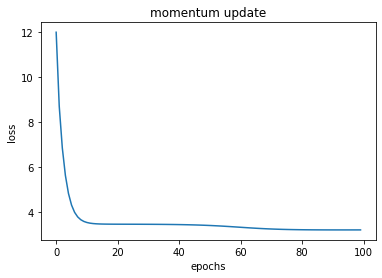

In [84]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = np.arange(100)
# corresponding y axis values
y = x2
  
plt.xlabel('epochs')
plt.ylabel('loss')
# plotting the points 
plt.plot(x, y)
plt.title('momentum update')
plt.show()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

In [77]:
epoch=100
rate=.001
m=np.zeros(9)
b1=.9
b2=0.999
v=np.zeros(9)
z=1e-8
mu, sigma = 0, 0.01 
w = np.random.normal(mu, sigma, 9) 

In [78]:
loss=[]
for i in tqdm(range(epoch)):
    y_=[]
    for j in range(len(X)):
        d1=forward_propagation(X[j],y[j],w)
        d2=backward_propagation(X[j],y[j],w,d1)
        y_.append(d1['dy_pred'])
        
        for k in range(len(w)):
            m[k]=b1*m[k]+(1-b1)*d2["dw"+str(k+1)]
            v[k]=b2*v[k]+(1-b2)*np.power(d2["dw"+str(k+1)],2)
            mt=m[k]/(1-b1)
            vt=v[k]/(1-b2)
            w[k]=w[k]-(rate/(np.sqrt(vt)+z))*mt


            

    temp=mean_squared_error(y,y_)
        
    loss.append(temp)

print("loss in each epoch")
print(loss)
x3=loss

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.63it/s]

loss in each epoch
[10.746224386037596, 7.723895321428921, 6.131030366353513, 5.027418728195767, 4.264382214122441, 3.7597583841475073, 3.453726128398432, 3.291823754129469, 3.221164449464829, 3.1973633818903235, 3.1920288613494217, 3.1921448238220598, 3.193492875429781, 3.194949326752782, 3.1961470310259315, 3.1969914645093627, 3.197549312669766, 3.197930386151326, 3.198211962352964, 3.198430896362008, 3.198603023174109, 3.1987379156055713, 3.1988437941600107, 3.19892710943811, 3.1989915777131275, 3.199038912957896, 3.1990704649297146, 3.199088358760244, 3.19909583350861, 3.19909692306684, 3.199095622491747, 3.1990949070218013, 3.1990960505640915, 3.1990985774866902, 3.199101026657231, 3.1991023807096113, 3.19910321576037, 3.19910505081804, 3.199108660012865, 3.1991136403490703, 3.1991186373131195, 3.1991227504911204, 3.1991271380150614, 3.199132070883476, 3.199135476870036, 3.1991359013998397, 3.199134053466453, 3.1991321596365054, 3.19913095944656, 3.1991324471997618, 3.199143299465

graph of epochs vs loss in adam update

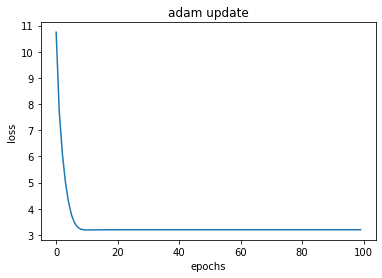

In [85]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = np.arange(100)
# corresponding y axis values
y = x3
  
plt.xlabel('epochs')
plt.ylabel('loss')
# plotting the points 
plt.plot(x, y)
plt.title('adam update')
plt.show()

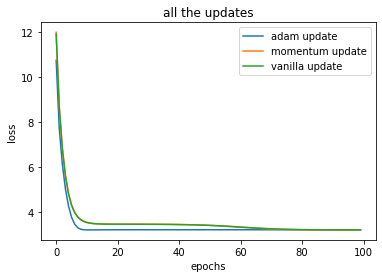

In [87]:
import matplotlib.pyplot as plt

# x axis values
x = np.arange(100)
# corresponding y axis values
y_3 = x3
y_2 = x2
y_1 = x1
  
plt.xlabel('epochs')
plt.ylabel('loss')
# plotting the points 
plt.plot(x, y_3,label = "adam update")
plt.plot(x, y_2,label = "momentum update")
plt.plot(x, y_1,label = "vanilla update")

plt.legend()
plt.title('all the updates')

plt.show()